A confidence interval is a range of values that is likely to contain the true population parameter with a certain level of confidence. In the case of the population mean, the equation you mentioned allows us to estimate the sample mean $(\hat{µ})$ based on the observed data.

$$\hat{µ} = \frac{1}{n} \sum \limits _ {i=1} ^{n} X_{i} ~ N (µ, \frac{σ^2}{n})$$

$\hat{µ}$: This represents the estimate of the population mean µ. The hat symbol (\hat{}) is often used to denote an estimate.

X_i: These are the individual observations or values in the sample. The subscript "i" indicates the i-th observation.

n: This represents the size of the sample, or the number of observations.

$N(µ, σ^2/n)$: This represents the distribution of the sample mean. The sample mean is assumed to follow a normal distribution with mean µ and variance σ^2/n.

The equation also provides information about the distribution of the sample mean. It states that the sample mean follows a normal distribution with mean µ and variance σ^2/n. The variance of the sample mean decreases as the sample size increases, reflecting a more precise estimation of the population mean.

The confidence interval is found as:

$$\hat{µ} ± Z_{value} * (\frac {σ}{n})$$

$\hat{µ}$: This represents the sample mean, which is an estimate of the population mean.

Z-value: This is the critical value from the standard normal distribution corresponding to the desired confidence level. It determines the width of the confidence interval.

σ: This is the population standard deviation, which is assumed to be known.

n: This represents the sample size, i.e., the number of observations in the sample.

This equation is applicable in situations where you have a known population standard deviation and want to estimate the population mean based on a sample. It is commonly used in statistical inference and hypothesis testing to make conclusions about the population mean using sample data.

In [3]:
import scipy.stats as stats
import math

# To estimate the population mean µ, you calculate the sample mean by taking the sum of all observations and dividing it by the sample size:

def calculate_confidence_interval(data, confidence_level):
    n = len(data)  # Sample size
    sample_mean = sum(data) / n  # Sample mean

    # Standard deviation of the sample
    sample_std = math.sqrt(sum([(x - sample_mean) ** 2 for x in data]) / (n - 1))

    # Z-value corresponding to the desired confidence level
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Margin of error
    margin_of_error = z_value * (sample_std / math.sqrt(n))

    # Confidence interval bounds
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return (lower_bound, upper_bound)

# Example usage
data = [2.5, 3.7, 4.1, 2.8, 3.9, 4.5, 3.3, 4.8, 3.7, 2.9]
confidence_level = 0.95

lower, upper = calculate_confidence_interval(data, confidence_level)

# This equation computes the average of the observed values in the sample. It provides an estimate of the population mean based on the available data.

print(f"Confidence Interval ({confidence_level * 100}%): ({lower}, {upper})")


Confidence Interval (95.0%): (3.156371956784613, 4.083628043215388)


The conservative approach or approach 1: Uses the mathematical upper boundary for σ to estimate confidence interval (CI) for a population proportion using the sample proportion as:

$$C_{1-a} = (\hat{p_{n}} - \frac{Z_{a/2}}{2\sqrt{n}}, \hat{p_{n}} + \frac{Z_{a/2}}{2\sqrt{n}})$$

$C_{1-a}$: This represents the confidence interval for the population proportion.

$\hat{p_{n}}$: This is the sample proportion, which is an estimate of the population proportion.

$Z_{a/2}$: This is the critical value from the standard normal distribution corresponding to the desired level of confidence. It determines the width of the confidence interval.

n: This represents the sample size, i.e., the number of observations in the sample.

In [4]:
import scipy.stats as stats
import math

def calculate_confidence_interval(data, confidence_level):
    n = len(data)  # Sample size
    p_hat = sum(data) / n  # Sample proportion

    # Standard error of the sample proportion
    std_error = math.sqrt((p_hat * (1 - p_hat)) / n)

    # Z-value corresponding to the desired confidence level
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Margin of error
    margin_of_error = z_value * (std_error / 2)

    # Confidence interval bounds
    lower_bound = p_hat - margin_of_error
    upper_bound = p_hat + margin_of_error

    return (lower_bound, upper_bound)

# Example usage
data = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0]  # Binary data, e.g., success or failure
confidence_level = 0.95

lower, upper = calculate_confidence_interval(data, confidence_level)

print(f"Confidence Interval ({confidence_level * 100}%): ({lower}, {upper})")


Confidence Interval (95.0%): (0.4481818425742008, 0.7518181574257992)


Finding sample size from confidence intervals - using approach 1:

In [5]:
import math

confidence_level = 0.99  # Desired confidence level
desired_interval_width = 0.05  # Desired width of the confidence interval

# Sample proportion
p_hat = 26 / 30

# Z-critical value (conservative approach)
z_critical = 2.576

# Calculate required sample size
n = math.ceil(((z_critical ** 2) * (0.25)) / ((desired_interval_width / 2) ** 2))

n

2655

The approximation for the sample mean, $\hat{p}_{n}$, from MLE for Bernoulli RVs (random variables) is:

$$\hat{p}_{n} = \bar X_{n} = \frac{1}{n} \sum \limits _ {i=1} ^{n} X_{i}$$

This can be used to estimate the confidence interval (CI) for a population proportion (approach 2):

$$C_{1-a} = \hat{p}_{n} - Z_{a/2} \sqrt{\frac{\bar X_{n}(1 - \bar X_{n})}{n}}, \hat{p}_{n} + Z_{a/2} \sqrt{\frac{\bar X_{n}(1 - \bar X_{n})}{n}}$$

$C_{1-a}$: This represents the confidence interval for the population proportion.

$\hat{p_{n}}$: This is the sample proportion, which is an estimate of the population proportion.

$Z_{a/2}$: This is the critical value from the standard normal distribution corresponding to the desired level of confidence. It determines the width of the confidence interval.

$\bar X_{n}$: This is the sample mean, which is an estimate of the population mean.

n: This represents the sample size, i.e., the number of observations in the sample.

This equation is applicable in situations where you have a sample proportion and sample mean, and you want to estimate the population proportion based on a sample. It is commonly used in survey research, quality control, and hypothesis testing to estimate proportions and make inferences about the population proportion.

This is only valid for Bernoulli RVs

In [6]:
import scipy.stats as stats
import numpy as np

# Sample data
data = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0])  # Binary data, e.g., success or failure
n = len(data)  # Sample size
confidence_level = 0.95

# Sample proportion
p_hat = np.sum(data) / n

# Z-critical value
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Standard error
std_error = np.sqrt((p_hat * (1 - p_hat)) / n)

# Confidence interval bounds
lower_bound = p_hat - z_critical * std_error
upper_bound = p_hat + z_critical * std_error

(lower_bound, upper_bound)

(0.29636368514840156, 0.9036363148515985)

Finding sample size from confidence intervals - using approach 2:

In [7]:
import scipy.stats as stats

confidence_level = 0.99  # Desired confidence level
desired_interval_width = 0.05  # Desired width of the confidence interval

n_succeses = 26 # succeses in the initial sample size
n_initial_sample = 30 # initial sample size

# Sample proportion
p_hat = n_succeses / n_initial_sample

# Z-critical value (conservative approach)
z_critical = 2.576

# Calculate required sample size
n = ((z_critical ** 2) * (p_hat * (1 - p_hat))) / ((desired_interval_width / 2) ** 2)

# Round up to the nearest integer
n = int(round(n))

n

1227

General approximation of the sample variance: 

$$\hat{\sigma}_n^2 = S_n^2 = \frac{1}{n-1} \sum \limits _ {i=1} ^{n} (X_{i} - \bar{X_n})^2 = \frac{1}{n-1} \sum \limits _ {i=1} ^{n} X_{i}^2 - n \bar{X_n}^2$$

General approximation of confidence interval:

$$C_{1-a} = (\hat{p}_{n} - Z_{a/2} \frac{\hat{\sigma}_n}{\sqrt{n}}, \hat{p}_{n} + Z_{a/2} \frac{\hat{\sigma}_n}{\sqrt{n}}) = (\hat{p}_{n} - Z_{a/2} \frac{S_n}{\sqrt{n}}, \hat{p}_{n} + Z_{a/2} \frac{S_n}{\sqrt{n}})$$

This applies to all kinds of distrubutions and variables.

Problem with small sample sizes = no good estimate for the variance

Solution: Calculate the confidence interval using the t-distrubtion:

$$C_{1-a} = (\hat{\mu}_n - T_{\frac{\alpha}{2}, n-1} \frac{\hat{\sigma}_n}{\sqrt{n}}, \hat{\mu}_n + T_{\frac{\alpha}{2}, n-1} \frac{\hat{\sigma}_n}{\sqrt{n}}) $$

Where $T_{\frac{\alpha}{2}, n-1}$ = t_critical is found as:


In [8]:
import scipy.stats as stats

n = 20  # Sample size
alpha = 0.05  # Significance level

t_critical = stats.t.ppf(1 - alpha/2, n - 1)

t_critical

2.093024054408263

Now we can find the confidence interval using:

In [9]:
import scipy.stats as stats
import numpy as np

# Sample data
data = np.array([10, 12, 15, 14, 13, 16, 11, 12, 14, 13])
n = len(data)  # Sample size
alpha = 0.05  # Significance level

# Sample mean and sample standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# T-critical value
t_critical = stats.t.ppf(1 - alpha/2, n - 1)

# Margin of error
margin_of_error = t_critical * (std_dev / np.sqrt(n))

# Confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

(lower_bound, upper_bound)

(11.693942953142248, 14.306057046857752)

Finding sample size from confidence intervals - using t_critical:

In [10]:
import scipy.stats as stats

confidence_level = 0.99  # Desired confidence level
desired_interval_width = 0.05  # Desired width of the confidence interval

n_succeses = 26 # succeses in the initial sample size
n_initial_sample = 30 # initial sample size
 
# Sample proportion
p_hat = n_succeses / n_initial_sample

# Degrees of freedom
df = n_initial_sample - 1  # n - 1, where n is the initial sample size

# t-critical value
t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

# Calculate required sample size
n = ((t_critical ** 2) * (p_hat * (1 - p_hat))) / ((desired_interval_width / 2) ** 2)

# Round up to the nearest integer
n = int(round(n))

n


1405

True average temperature: mu = 6
Sample sizes: n1 = 10 , n2 = 1000
MLEs: mu_hat1 = 5.6810899865524265 , mu_hat2 = 6.019664998550818
The 99.0% confidence interval is using Za/2 (4.86654124025045, 6.4956387328544025) when n is 10.
The 99.0% confidence interval is using Za/2 (5.93821012392062, 6.101119873181015) when n is 1000.
The 99.0% confidence interval is using Ta/2,n-1 (4.653401752546331, 6.708778220558522) when n is 10.
The 99.0% confidence interval is using Ta/2,n-1 (5.938054213078861, 6.101275784022774) when n is 1000.
The fraction outside is 30.0% when n is 10.
The fraction outside is 94.0% when n is 1000.


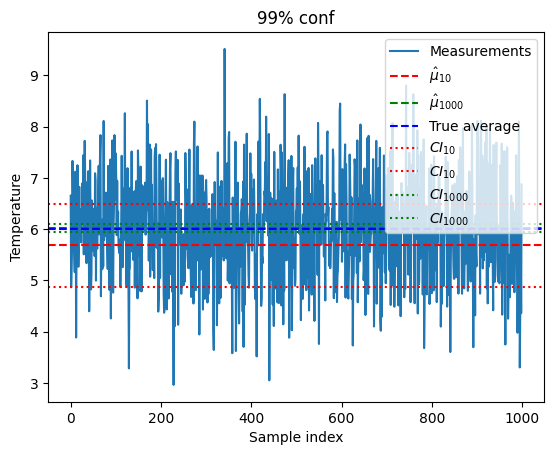

In [11]:
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt

# True average temperature
mu = 6

# Known variance if not know put 1 and only look at the Ta/2,n-1
sigma2 = 1

# Sample sizes
n1 = 10
n2 = 1000

#choose one of the three confidence levels also known as alpha
#standards being 0.1, 0.05, 0.01
alpha = 0.01

conf= (1 - alpha)*100
conf = str(conf)
#the z_score of the most common confidence levels is shown and used here
z_score = norm.ppf(1-alpha/2)

#sigma is the confidence interval
#offent shown as
#+-sigma
#this is the number being squred
sigma = math.sqrt(1)

# Generate a random sample of temperatures
x = mu + np.random.randn(n2)*np.sqrt(sigma2)
y = mu + np.random.randn(n1)*np.sqrt(sigma2)

# Calculate MLEs for different sample sizes
mu_hat1 = np.mean(y[:n1])
mu_hat2 = np.mean(x[:n2])

CIz1 = (mu_hat1 - z_score * sigma / math.sqrt(n1), mu_hat1 + z_score * sigma / math.sqrt(n1))
CIz2 = (mu_hat2 - z_score * sigma / math.sqrt(n2), mu_hat2 + z_score * sigma / math.sqrt(n2))

#Based on the created array and alpha the t score is calculated
t_score1 = abs(t.ppf(alpha/2, n1-1))
#Based on the array and alpha the t score is calculated
t_score2 = abs(t.ppf(alpha/2, n2-1))

#Then to Confidence interval is being calculated
CIt1 = (mu_hat1 - t_score1 * sigma / math.sqrt(n1), mu_hat1 + t_score1 * sigma / math.sqrt(n1))
#Then to Confidence interval is being calculated
CIt2 = (mu_hat2 - t_score2 * sigma / math.sqrt(n2), mu_hat2 + t_score2 * sigma / math.sqrt(n2))

# Count samples outside CIs
frac_outside1 = sum((y[:n1] < CIt1[0]) | (y[:n1] > CIt1[1])) / n1
frac_outside2 = sum((x[:n2] < CIt2[0]) | (x[:n2] > CIt2[1])) / n2

# Plot the collected measurements and the estimated MLEs
plt.plot(x, label="Measurements")
plt.axhline(y=mu_hat1, color='r', linestyle='--', label=r"$\hat{\mu}_{10}$")
plt.axhline(y=mu_hat2, color='g', linestyle='--', label=r"$\hat{\mu}_{1000}$")

plt.axhline(y=mu, color='b', linestyle='--', label="True average")

plt.axhline(y=CIz1[0], color='r', linestyle=':', label=r"$CI_{10}$")
plt.axhline(y=CIz1[1], color='r', linestyle=':', label=r"$CI_{10}$")
plt.axhline(y=CIz2[0], color='g', linestyle=':', label=r"$CI_{1000}$")
plt.axhline(y=CIz2[1], color='g', linestyle=':', label=r"$CI_{1000}$")

# Print results
print("True average temperature: mu =", mu)
print("Sample sizes: n1 =", n1, ", n2 =", n2)
print("MLEs: mu_hat1 =", mu_hat1, ", mu_hat2 =", mu_hat2)

print(f"The {conf}% confidence interval is using Za/2 {CIz1} when n is {n1}.")
print(f"The {conf}% confidence interval is using Za/2 {CIz2} when n is {n2}.")

print(f"The {conf}% confidence interval is using Ta/2,n-1 {CIt1} when n is {n1}.")
print(f"The {conf}% confidence interval is using Ta/2,n-1 {CIt2} when n is {n2}.")

print(f"The fraction outside is {frac_outside1 * 100}% when n is {n1}.")
print(f"The fraction outside is {frac_outside2 * 100}% when n is {n2}.")

plt.title("99% conf")
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Temperature")
plt.show()

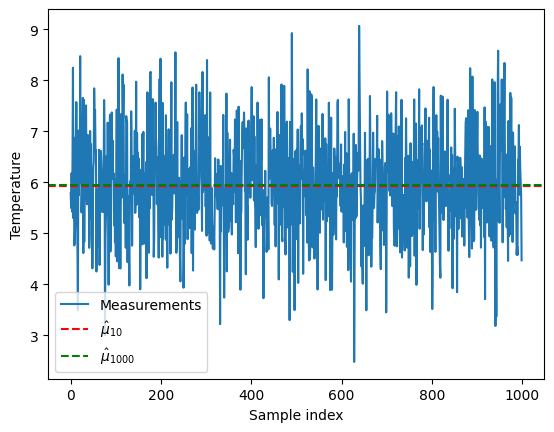

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# True average temperature
mu = 6

# Known variance
sigma2 = 1

# Sample sizes
n1 = 10
n2 = 1000

# Generate a random sample of temperatures
x = mu + np.random.randn(n2)*np.sqrt(sigma2)

# Calculate MLEs for different sample sizes
mu_hat1 = np.mean(x[:n1])
mu_hat2 = np.mean(x[:n2])

# Plot the collected measurements and the estimated MLEs
plt.plot(x, label="Measurements")
plt.axhline(y=mu_hat1, color='r', linestyle='--', label=r"$\hat{\mu}_{10}$")
plt.axhline(y=mu_hat2, color='g', linestyle='--', label=r"$\hat{\mu}_{1000}$")
plt.legend()
plt.xlabel("Sample index")
plt.ylabel("Temperature")
plt.show()
